In [4]:
import sys
import glob
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [6]:
corr = pd.read_csv('Gender_vertex_corr.csv')
corr.drop(corr.columns[0], axis=1, inplace=True)

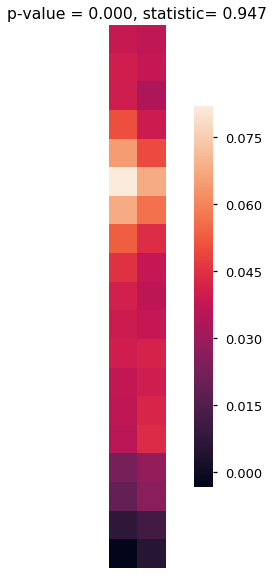

In [7]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot = sns.heatmap(np.flipud(corr), ax=ax, square=True, cbar_kws = dict(shrink=0.7), xticklabels=False,
            yticklabels=False)
    plot.set_title('p-value = {:.3f}, statistic= {:.3f}'.format(0.000, 0.947))

In [174]:
stats = pd.read_csv("mgc-test-stats_gender_vertex.csv")
stats.drop(stats.columns[0], axis=1, inplace=True)
stats = stats['V1']

feats = np.zeros((3,2))
max_ind = stats.argsort()[-3:][::-1]

data = pd.read_csv("hbn_vertexstats.csv")
Ydata = data['sex']
Y = Ydata.values
X1 = data.iloc[:,260]
X2 = data.iloc[:,68]
X3 = data.iloc[:,20]
X = np.zeros((91,3))
for i in range(0,len(Y)):
    X[i,0] = X1[i]
    X[i,1] = X2[i]
    X[i,2] = X3[i]

30


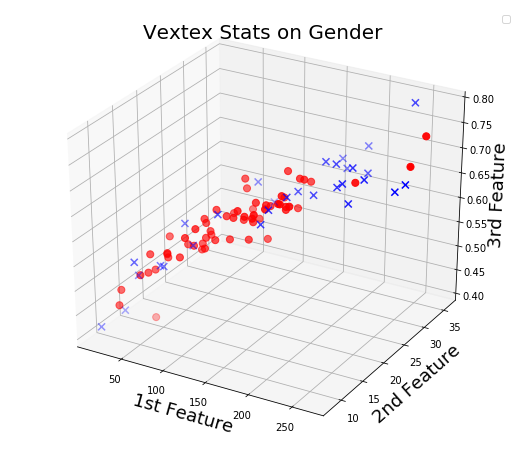

In [168]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

print(sum(Y))
X1 = np.zeros((61,3))
X2 = np.zeros((30,3))
count1 = 0;
count2 = 0;
for i in range(0,len(Y)):
    if Y[i] == 0.:
        X1[count1,0] = X[i,0]
        X1[count1,1] = X[i,1]
        X1[count1,2] = X[i,2]
        count1 = count1+1
    else:
        X2[count2,0] = X[i,0]
        X2[count2,1] = X[i,1]
        X2[count2,2] = X[i,2]
        count2 = count2+1

        

rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 2)]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0],X1[:,1],X1[:,2], s=50, c='r', marker = 'o');
ax.scatter(X2[:,0],X2[:,1],X2[:,2], s=50, c='b', marker = 'x');


plt.title('Vextex Stats on Gender', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [172]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=2, threshold=0.9, compute_labels=True)
brc.fit(X)
brc.predict(X)
core_samples_mask = np.zeros_like(brc.labels_, dtype=bool)
core_samples_mask[brc.subcluster_labels_] = True
blabels = brc.labels_

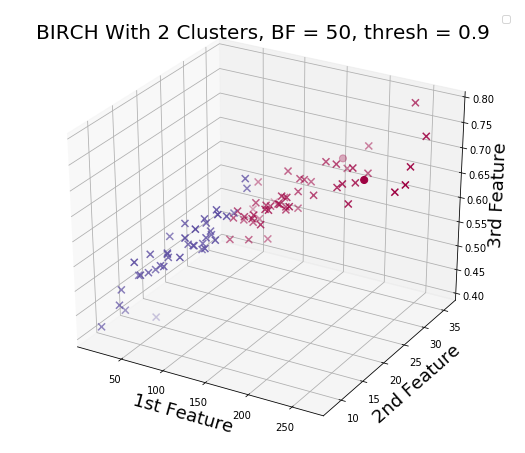

In [173]:
rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

bunique_labels = set(blabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(bunique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(bunique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (blabels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('BIRCH With 2 Clusters, BF = 50, thresh = 0.9', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [175]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

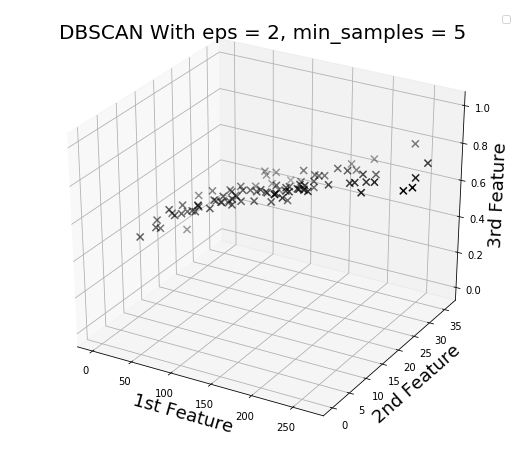

In [176]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('DBSCAN With eps = 2, min_samples = 5', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

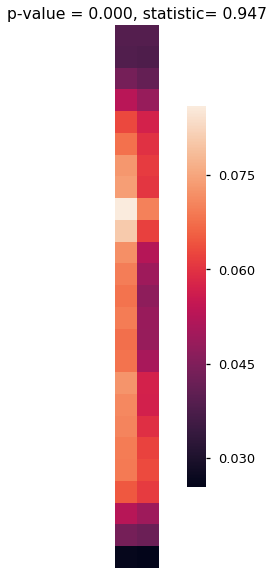

In [149]:
corr = pd.read_csv('Age_vertex_corr.csv')
corr.drop(corr.columns[0], axis=1, inplace=True)

with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot = sns.heatmap(np.flipud(corr), ax=ax, square=True, cbar_kws = dict(shrink=0.7), xticklabels=False,
            yticklabels=False)
    plot.set_title('p-value = {:.3f}, statistic= {:.3f}'.format(0.000, 0.947))

stats = pd.read_csv("mgc-test-stats_age_vertex.csv")
stats.drop(stats.columns[0], axis=1, inplace=True)
stats = stats['V1']

feats = np.zeros((3,2))
max_ind = stats.argsort()[-3:][::-1]
feats[0,0] = stats[115]
feats[0,1] = 115
feats[1,0] = stats[259]
feats[1,1] = 259
feats[2,0] = stats[285]
feats[2,1] = 285

data = pd.read_csv("hbn_vertexstats.csv")
Ydata = data['age']
Ydata = Ydata.values
Ydata.flatten
Ydata.flatten
Y = np.zeros((91,1))
for i in range(0,len(Y)):
    Y[i] = int(Ydata[i] > 10.5)
X1 = data.iloc[:,118]
X2 = data.iloc[:,262]
X3 = data.iloc[:,288]
X = np.zeros((91,3))
for i in range(0,len(Y)):
    X[i,0] = X1[i]
    X[i,1] = X2[i]
    X[i,2] = X3[i]



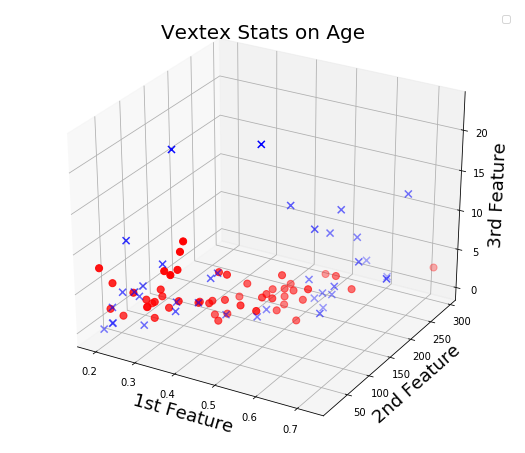

In [147]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

X1 = np.zeros((52,3))
X2 = np.zeros((39,3))
count1 = 0;
count2 = 0;
for i in range(0,len(Y)):
    if Y[i] == 0.:
        X1[count1,0] = X[i,0]
        X1[count1,1] = X[i,1]
        X1[count1,2] = X[i,2]
        count1 = count1+1
    else:
        X2[count2,0] = X[i,0]
        X2[count2,1] = X[i,1]
        X2[count2,2] = X[i,2]
        count2 = count2+1

        

rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 2)]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0],X1[:,1],X1[:,2], s=50, c='r', marker = 'o');
ax.scatter(X2[:,0],X2[:,1],X2[:,2], s=50, c='b', marker = 'x');


plt.title('Vextex Stats on Age', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

    

In [107]:
brc = Birch(branching_factor=100, n_clusters=2, threshold=0.9, compute_labels=True)
brc.fit(X)
brc.predict(X)
core_samples_mask = np.zeros_like(brc.labels_, dtype=bool)
core_samples_mask[brc.subcluster_labels_] = True
blabels = brc.labels_

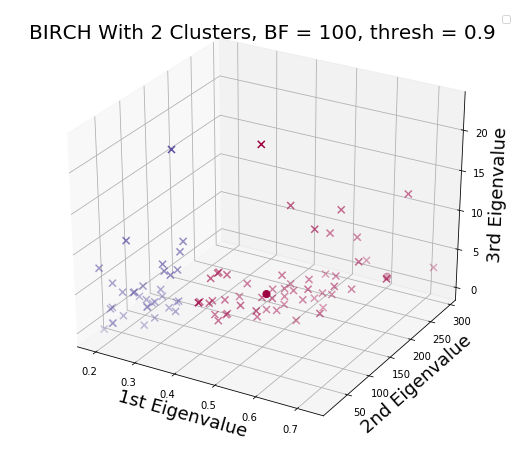

In [110]:
rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

bunique_labels = set(blabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(bunique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(bunique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (blabels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('BIRCH With 2 Clusters, BF = 100, thresh = 0.9', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [122]:
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

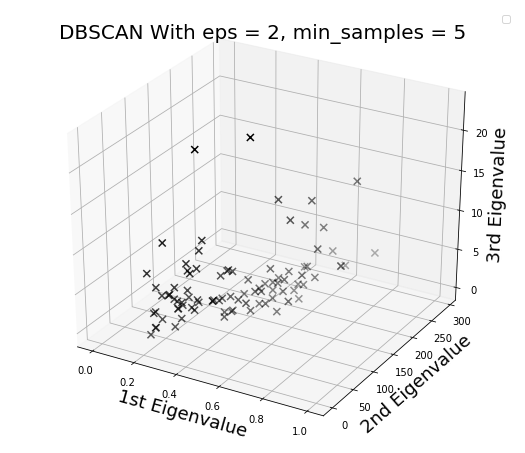

In [123]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('DBSCAN With eps = 2, min_samples = 5', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

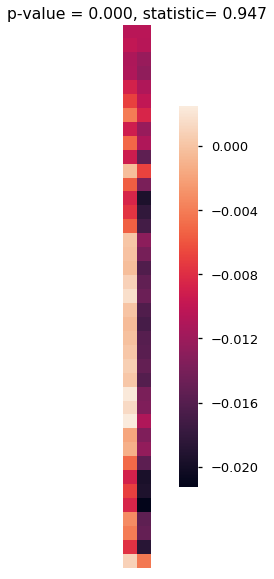

In [189]:
from sklearn.decomposition import PCA
corr = pd.read_csv('Gender_feature_corr.csv')
corr.drop(corr.columns[0], axis=1, inplace=True)

with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot = sns.heatmap(np.flipud(corr), ax=ax, square=True, cbar_kws = dict(shrink=0.7), xticklabels=False,
            yticklabels=False)
    plot.set_title('p-value = {:.3f}, statistic= {:.3f}'.format(0.000, 0.947))

stats = pd.read_csv("mgc-test-stats_gender_feature.csv")
stats.drop(stats.columns[0], axis=1, inplace=True)
stats = stats['V1']


feats = np.zeros((3,2))
max_ind = stats.argsort()[-3:][::-1]

data = pd.read_csv("hbn_vertexstats.csv")
Ydata = data['sex']
Y = Ydata.values
X1 = data.iloc[:,4:51]
X2 = data.iloc[:,148:195]
X3 = data.iloc[:,52:99]
X = np.hstack((X1,X2,X3))

pca = PCA(n_components=3)
X = pca.fit_transform(X)

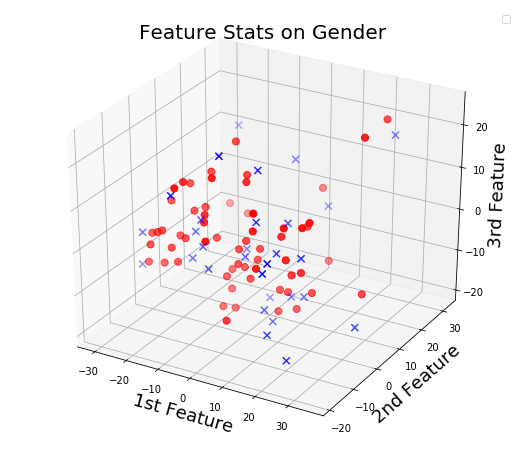

In [184]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

X1 = np.zeros((61,3))
X2 = np.zeros((30,3))
count1 = 0;
count2 = 0;
for i in range(0,len(Y)):
    if Y[i] == 0.:
        X1[count1,0] = X[i,0]
        X1[count1,1] = X[i,1]
        X1[count1,2] = X[i,2]
        count1 = count1+1
    else:
        X2[count2,0] = X[i,0]
        X2[count2,1] = X[i,1]
        X2[count2,2] = X[i,2]
        count2 = count2+1

        

rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 2)]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0],X1[:,1],X1[:,2], s=50, c='r', marker = 'o');
ax.scatter(X2[:,0],X2[:,1],X2[:,2], s=50, c='b', marker = 'x');


plt.title('Feature Stats on Gender', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [185]:
brc = Birch(branching_factor=100, n_clusters=2, threshold=0.9, compute_labels=True)
brc.fit(X)
brc.predict(X)
core_samples_mask = np.zeros_like(brc.labels_, dtype=bool)
core_samples_mask[brc.subcluster_labels_] = True
blabels = brc.labels_

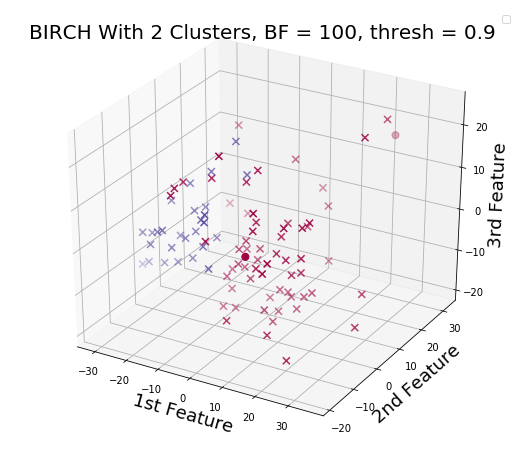

In [186]:
rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

bunique_labels = set(blabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(bunique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(bunique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (blabels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('BIRCH With 2 Clusters, BF = 100, thresh = 0.9', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [187]:
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

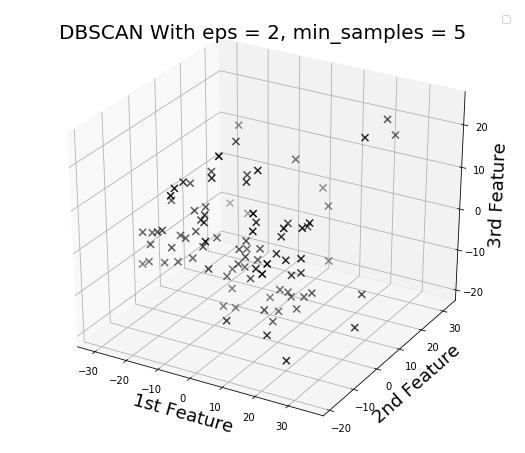

In [188]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('DBSCAN With eps = 2, min_samples = 5', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

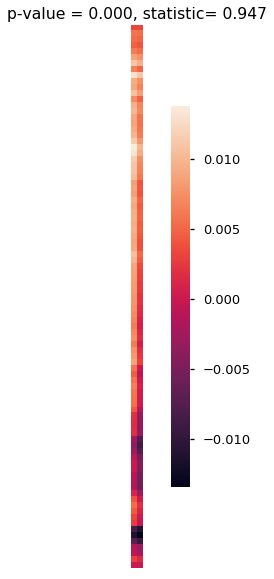

In [201]:
corr = pd.read_csv('Age_feature_corr.csv')
corr.drop(corr.columns[0], axis=1, inplace=True)

with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot = sns.heatmap(np.flipud(corr), ax=ax, square=True, cbar_kws = dict(shrink=0.7), xticklabels=False,
            yticklabels=False)
    plot.set_title('p-value = {:.3f}, statistic= {:.3f}'.format(0.000, 0.947))
    
stats = pd.read_csv("mgc-test-stats_age_feature.csv")
stats.drop(stats.columns[0], axis=1, inplace=True)
stats = stats['V1']
    
feats = np.zeros((3,2))
max_ind = stats.argsort()[-3:][::-1]

data = pd.read_csv("hbn_vertexstats.csv")
Ydata = data['age']
Ydata = Ydata.values
Ydata.flatten
Ydata.flatten
Y = np.zeros((91,1))
for i in range(0,len(Y)):
    Y[i] = int(Ydata[i] > 10.5)

X1 = data.iloc[:,148:195]
X2 = data.iloc[:,4:51]
X3 = data.iloc[:,196:243]
X = np.hstack((X1,X2,X3))

pca = PCA(n_components=3)
X = pca.fit_transform(X)

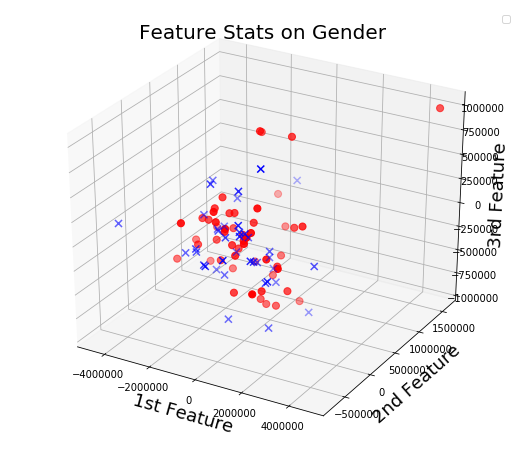

In [198]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

X1 = np.zeros((52,3))
X2 = np.zeros((39,3))
count1 = 0;
count2 = 0;
for i in range(0,len(Y)):
    if Y[i] == 0.:
        X1[count1,0] = X[i,0]
        X1[count1,1] = X[i,1]
        X1[count1,2] = X[i,2]
        count1 = count1+1
    else:
        X2[count2,0] = X[i,0]
        X2[count2,1] = X[i,1]
        X2[count2,2] = X[i,2]
        count2 = count2+1

        

rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 2)]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0],X1[:,1],X1[:,2], s=50, c='r', marker = 'o');
ax.scatter(X2[:,0],X2[:,1],X2[:,2], s=50, c='b', marker = 'x');


plt.title('Feature Stats on Gender', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [202]:
brc = Birch(branching_factor=100, n_clusters=2, threshold=0.9, compute_labels=True)
brc.fit(X)
brc.predict(X)
core_samples_mask = np.zeros_like(brc.labels_, dtype=bool)
core_samples_mask[brc.subcluster_labels_] = True
blabels = brc.labels_

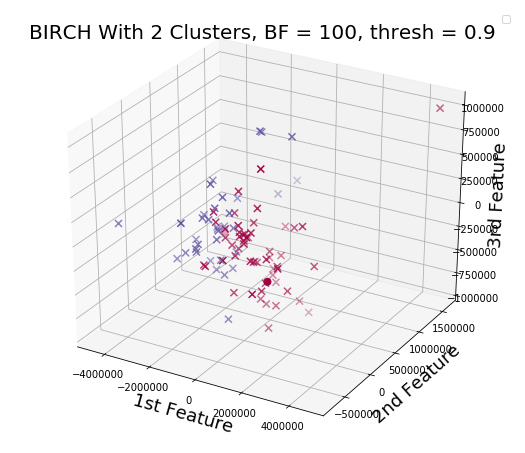

In [203]:
rcParams.update({"figure.figsize":(7, 6)})
rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})

bunique_labels = set(blabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(bunique_labels))]

fig = plt.figure()
ax = Axes3D(fig)
for k, col in zip(bunique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (blabels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50, c=tuple(col), marker = 'o');

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=50,c=tuple(col), marker = 'x');

plt.title('BIRCH With 2 Clusters, BF = 100, thresh = 0.9', fontsize=20)
plt.xlabel('1st Feature', fontsize=18)
plt.ylabel('2nd Feature', fontsize=18)
ax.set_zlabel('3rd Feature', fontsize=18)
ax.set_facecolor('white')
ax.xaxis._axinfo['label']['space_factor'] = 5
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [204]:
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)